# Initializations

In [1]:
FILEPATH = "Data/homicide_data.csv"

# Imports

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# Data Loading

In [3]:
df = pd.read_csv(FILEPATH)

In [83]:
df['Date of Report'] = pd.to_datetime(df['Date of Report']) # Convert date of report to datetime
df['Date1 of Occurrence'] = pd.to_datetime(df['Date1 of Occurrence'])
df.head(1)

,Incident Number w/year,Year of Incident,Service Number ID,Watch,Call (911) Problem,Type of Incident,Type Location,Type of Property,Incident Address,Apartment Number,...,NIBRS Code,NIBRS Group,NIBRS Type,Update Date,X Coordinate,Y Cordinate,Zip Code,City,State,Location1
0,64280-2017,2017,264280-2017-01,3,19 - SHOOTING,MURDER,Other,Other,NaN,NaN,...,09A,A,Coded,2019-06-06 02:46:52.0000000,NaN,NaN,NaN,NaN,NaN,NaN


# Visualizations

## Barplot - Homicides per year

In [84]:
df_yearly_homicides = df.groupby('Year of Incident')['NIBRS Crime Category'].count()

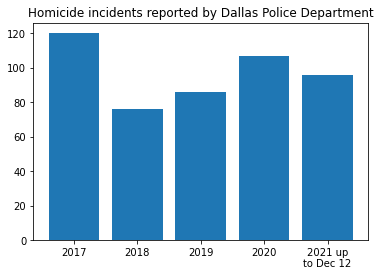

In [129]:
fig, ax = plt.subplots()
ax.bar(x=df_yearly_homicides.index,height=df_yearly_homicides)
ax.set(title = "Homicide incidents reported by Dallas Police Department")
ax.set_xticks([2017,2018,2019,2020,2021])
ax.set_xticklabels(['2017', '2018', '2019', '2020', '2021 up\nto Dec 12'])
fig.savefig('Homicide yearly.png')

## Homicides year-over-year

In [34]:
df_homicides_per_day = df.groupby('Date1 of Occurrence')['NIBRS Crime'].count()

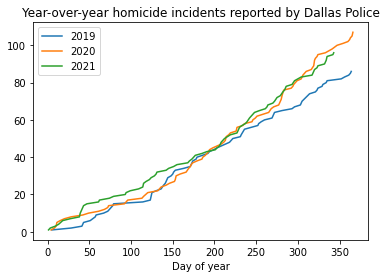

In [87]:
fig, ax = plt.subplots()

df_2019 = df_homicides_per_day['2019-01-01' : '2019-12-31']
ax.plot(df_2019.index.dayofyear,
           df_2019.cumsum(),
        label = '2019')


df_2020 = df_homicides_per_day['2020-01-01' : '2020-12-31']
ax.plot(df_2020.index.dayofyear,
           df_2020.cumsum(),
        label = '2020')

df_2021 = df_homicides_per_day['2021-01-01' : '2021-12-31']
ax.plot(df_2021.index.dayofyear,
           df_2021.cumsum(),
        label = '2021')

ax.set(title = "Year-over-year homicide incidents reported by Dallas Police")
ax.set_xlabel("Day of year")

ax.legend()
fig.savefig('Homicides year-over-year.png')

## Homicides by weapon type

In [124]:
# Group homicides by year and weapon used
df_weapons = df.groupby(['Year of Incident','Weapon Used'])['NIBRS Crime'].count()
df_weapons = df_weapons.reset_index()
df_weapons = df_weapons.rename({'NIBRS Crime':'Number of Incidents'}, axis = 'columns')

# Sort weapons used between guns and all other
guns_list = ['Handgun', 'Other Firearm', 'Rifle', 'Assault Weapon', 'Firearm (Type Not Stated)', 'Shotgun', 'Other Gun']
def is_gun (row):
    if row['Weapon Used'] in set(guns_list):
        row['Gun'] = True
    else:
        row['Gun'] = False
    return row
df_guns = df_weapons.apply(is_gun, axis='columns')

df_guns = df_guns.groupby(['Year of Incident','Gun'])['Number of Incidents'].sum()
df_guns = df_guns.reset_index()

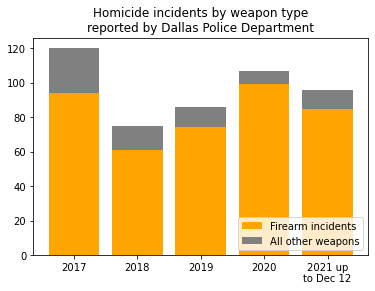

In [128]:
fig, ax = plt.subplots()

x = sorted(df_guns['Year of Incident'].unique())
y1 = df_guns[df_guns['Gun'] == True]["Number of Incidents"] # Gun-related incidents
y2 = df_guns[df_guns['Gun'] == False]["Number of Incidents"] # Non-firearm related

ax.bar(x, y1, label = "Firearm incidents", color = "orange")
ax.bar(x, y2, label = "All other weapons", bottom = y1, color = "grey")

ax.set(title = "Homicide incidents by weapon type\nreported by Dallas Police Department")
ax.set_xticks([2017,2018,2019,2020,2021])
ax.set_xticklabels(['2017', '2018', '2019', '2020', '2021 up\nto Dec 12'])

ax.legend(loc="lower right")

fig.savefig("Homicides by weapon type")